In [53]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [54]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [55]:
x_train = x_train / 255.0
x_test = x_test / 255.0

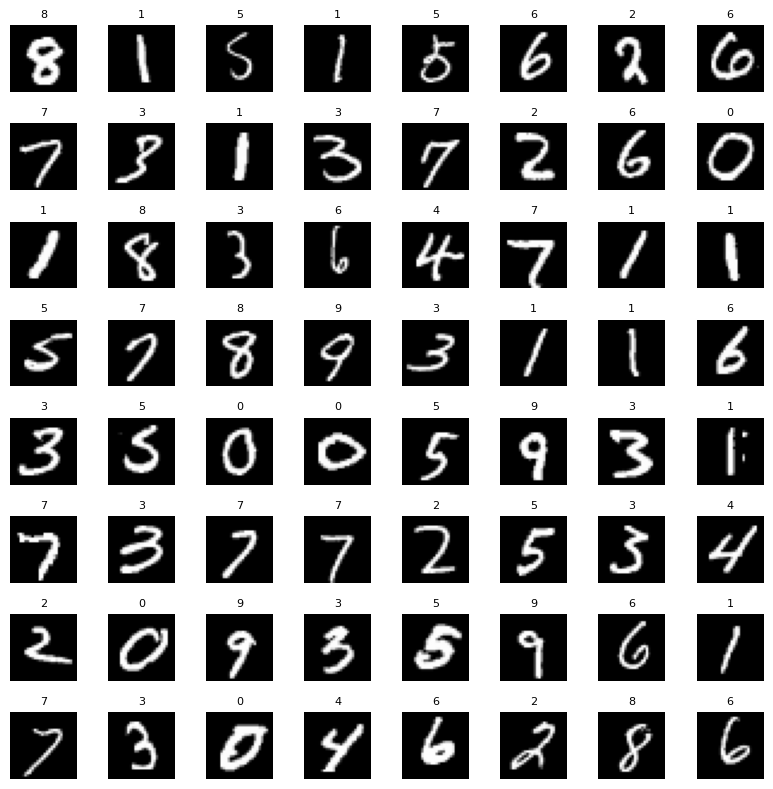

In [56]:
indices = np.random.choice(len(x_train), 64, replace=False)
images = x_train[indices]
labels = y_train[indices]
plt.figure(figsize=(8,8))
for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(f"{labels[i]}", fontsize=8) 
    plt.axis("off")
plt.tight_layout()
plt.show()


In [57]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(50,activation='relu'),
    Dropout(0.3),
    Dense(35,activation='relu'),
    Dropout(0.3),
    Dense(25,activation='relu'),
    Dropout(0.3),
    Dense(10,activation='linear')
])
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 35)             │         1,785 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 35)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 25)             │           900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10)             │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,195 (164.82 KB)

 Trainable params: 42,195 (164.82 KB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(optimizer=Adam(0.001),
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(x_train,y_train,
    epochs=10,
    validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7394 - loss: 0.8071 - val_accuracy: 0.9253 - val_loss: 0.2660
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8742 - loss: 0.4520 - val_accuracy: 0.9421 - val_loss: 0.2043
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8947 - loss: 0.3853 - val_accuracy: 0.9432 - val_loss: 0.1948
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9068 - loss: 0.3441 - val_accuracy: 0.9511 - val_loss: 0.1771
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9129 - loss: 0.3227 - val_accuracy: 0.9535 - val_loss: 0.1678
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9171 - loss: 0.3092 - val_accuracy: 0.9539 - val_loss: 0.1636
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9195 - loss: 0.3015 - val_accuracy: 0.9531 - val_loss: 0.1627
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9240 - loss: 0.2857 - 

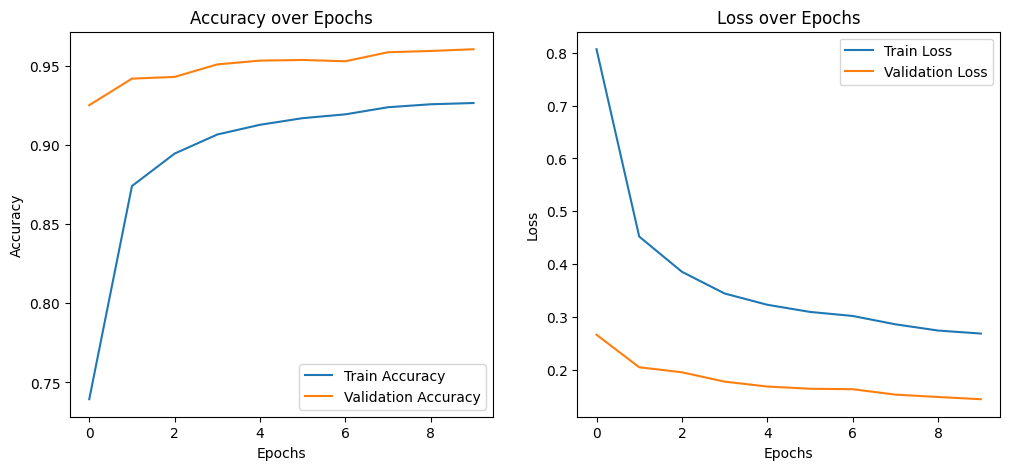

In [59]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy over Epochs")
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss over Epochs")
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


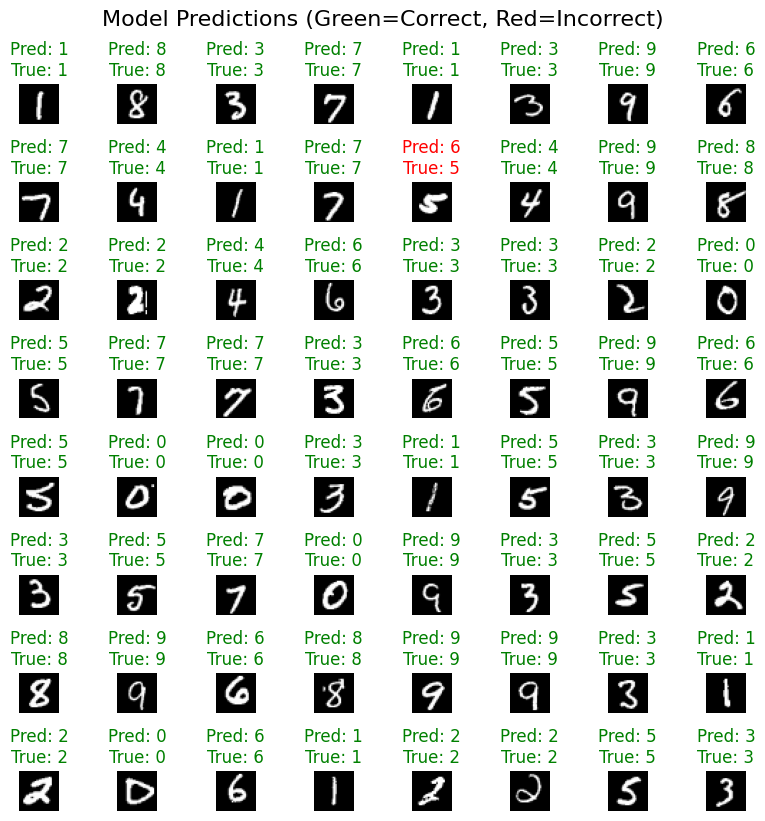

In [60]:
num_images = 64
indices = np.random.choice(len(x_test), num_images, replace=False)
images_to_predict = x_test[indices]
true_labels = y_test[indices]
predictions_raw = model.predict(images_to_predict)
predicted_labels = np.argmax(predictions_raw, axis=1)
plt.figure(figsize=(8, 8))
for i in range(num_images):
    plt.subplot(8, 8, i + 1)
    plt.imshow(images_to_predict[i], cmap="gray")
    is_correct = (predicted_labels[i] == true_labels[i])
    title_color = 'green' if is_correct else 'red'
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {true_labels[i]}", color=title_color)
    plt.axis("off")
plt.tight_layout()
plt.suptitle("Model Predictions (Green=Correct, Red=Incorrect)", y=1.02, fontsize=16)
plt.show()